<h3>Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

<h3>Reading in Data

In [2]:
df = pd.read_csv("clusters.csv")
df.head(10)

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
5,-0.211915,0.327702,-0.176617
6,4.019112,3.413443,3.348243
7,2.751609,1.853016,1.372020
8,0.214353,-0.965322,0.196772
9,-0.270354,-0.432669,-1.009055


In [3]:
df.shape

(1000, 3)

In [4]:
df.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


<h3>Performing the Elbow Test

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

print(wcss)
    

[4721.740630966437, 1727.5419292765373, 1190.4152425629263, 960.9147079692091, 882.5629875252408, 812.0277993160838, 747.3919293954174, 693.8621729078475, 636.9422017932184, 596.7339200960755]


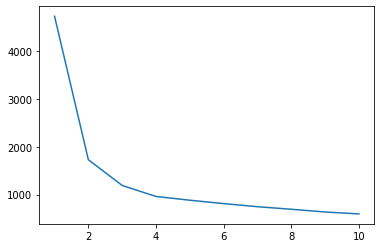

In [6]:
plt.plot(range(1, 11), wcss)

This elbow chart shows that 4 number of clusters would be a good fit for this data.

<h3>Using K-Means to Fit

In [7]:
kmeans = KMeans(n_clusters=4, max_iter=1000, init="k-means++", n_init=100)
k_clusters = kmeans.fit_predict(df)
print(k_clusters)

[1 1 0 0 1 1 0 3 1 1 0 2 2 3 3 3 0 2 3 3 1 3 1 1 3 2 0 1 2 3 2 1 0 3 3 1 3
 3 1 3 3 3 0 2 0 1 1 0 0 3 1 2 0 0 0 0 3 1 0 1 1 1 1 1 3 3 2 3 2 0 2 3 3 0
 2 3 3 3 1 2 3 2 0 2 3 0 2 3 3 2 2 2 0 3 2 3 0 3 0 2 3 2 0 2 3 2 0 3 3 0 3
 2 1 1 2 0 2 0 1 2 3 2 0 0 1 3 2 3 0 1 2 2 2 3 2 2 3 1 3 2 1 2 2 1 0 0 3 0
 3 3 0 1 1 3 1 2 1 3 3 3 2 1 0 0 3 2 2 1 1 0 1 2 3 0 3 2 2 3 3 1 3 1 2 2 3
 0 1 0 0 2 2 1 2 3 0 2 3 3 1 0 2 0 0 0 1 1 0 3 0 1 0 0 2 1 0 3 3 0 1 0 3 1
 2 0 2 3 2 1 2 1 3 1 2 3 1 0 0 1 0 2 0 2 0 3 3 2 0 1 1 3 0 3 2 2 0 0 0 1 0
 1 3 0 0 3 1 3 2 2 2 3 0 1 3 2 1 2 0 3 3 1 0 0 2 1 1 0 0 2 0 1 1 2 1 0 0 0
 3 3 2 1 0 3 0 2 1 3 1 3 2 1 2 1 1 2 2 1 1 1 2 2 1 3 1 3 1 0 1 1 3 3 3 2 1
 0 0 3 3 2 2 3 0 2 1 3 0 3 3 1 3 2 1 3 3 0 0 0 1 3 0 2 2 2 1 1 3 0 2 0 3 0
 3 0 2 1 0 1 2 0 1 3 2 2 3 3 2 3 0 3 3 1 3 0 2 0 2 0 3 3 2 0 1 0 2 1 0 1 3
 2 1 2 0 3 2 0 2 0 0 2 0 1 1 1 1 0 3 2 3 1 3 3 1 1 2 3 2 0 1 2 0 1 0 0 1 0
 3 2 0 0 1 3 0 3 3 1 0 3 0 2 3 2 0 2 3 1 1 3 0 3 3 2 3 3 0 2 1 1 3 2 1 1 1
 2 0 2 1 0 1 0 1 2 2 0 3 

<h3>Trimming the features to 2

In [8]:
pca = PCA(n_components=2).fit(df)
features_2d = pca.transform(df)
len(features_2d)

1000

<h3>Plotting a Scatterplot

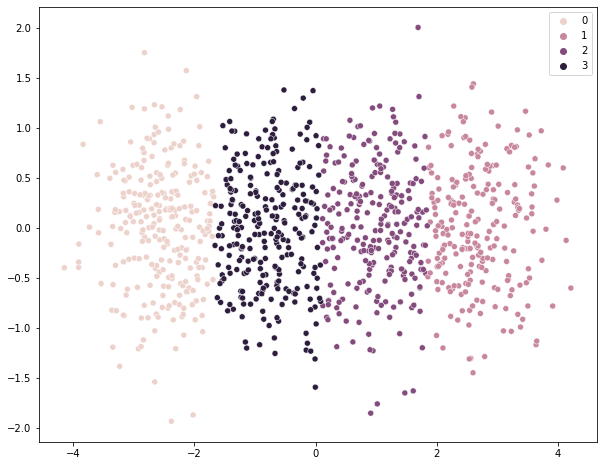

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = features_2d[:,0], y=features_2d[:,1], hue=k_clusters)

The above shown scatterplot shows a good distribution of data based on 4 clusters.